# group articles by authors

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
from beakerx import *

In [3]:
import bibigraph as big

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
biblio = big.Bibliography()

datafile = 'data/citing_Nye1953_journals.bib'
biblio.load( datafile )

930 articles added


In [6]:
biblio.articles[4]

A unified framework for polycr... (2018) International Journal of Plasticity

In [7]:
import networkx as nx

In [8]:
# Build a distance matrix between each article
# the distance function is the number of authors in both article
# - create a networkx Graph -

distanceByCoauthors = nx.Graph()
for i, articleA in enumerate( biblio.articles ):
    for j in range( i+1, len(biblio.articles) ):
        articleB = biblio.articles[j]

        authorsA = set( articleA.authors )
        authorsB = set( articleB.authors )

        nCommun = len( authorsA & authorsB ) # intersection
        if nCommun>1:
            ebunch = (articleA.key, articleB.key, {'weight': nCommun})
            distanceByCoauthors.add_edges_from([ebunch ])
            
cc = nx.connected_components(distanceByCoauthors)
groupByAuthors = [c for c in sorted(cc, key=len, reverse=True)]

In [9]:
print('Nombre de groupes: %i' % len(groupByAuthors))
print('Nombre de publications dans les 10 plus grands groupes:')
print( [len(c) for c in groupByAuthors[:10]] )
print( 'Nombre de duo: %i' % len( [c for c in groupByAuthors if len(c)==2] ) )
print( 'Nombre de publications en grps: %i' % sum( [len(c) for c in groupByAuthors] ) )

Nombre de groupes: 109
Nombre de publications dans les 10 plus grands groupes:
[45, 44, 35, 22, 20, 9, 8, 8, 8, 8]
Nombre de duo: 50
Nombre de publications en grps: 487


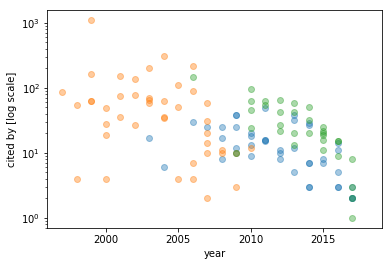

In [76]:
def getYearCitedBy(key):
    
    article = biblio.getArticleFromKey(key)
    return (article.year, article.nbrCitation)

for groupId in range(len(groupByAuthors[:3])):
    year, CitedBy = zip( *[ getYearCitedBy(key) for key in groupByAuthors[groupId]] )

    plt.semilogy( year, CitedBy, 'o', alpha=0.4 )
    
    
plt.xlabel('year');plt.ylabel('cited by [log scale]');

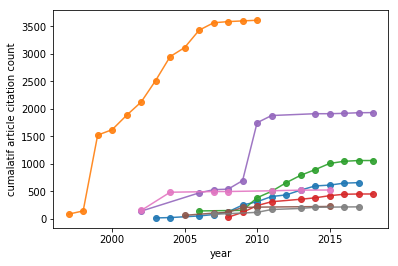

In [77]:
def getYearCount(key):
    
    article = biblio.getArticleFromKey(key)
    return (article.year, article.nbrCitation)

groupId = 8

for groupId in range(len(groupByAuthors[:8])):
    yearsCitedBy = [ getYearCount(key) for key in groupByAuthors[groupId]]

    years, citedBy = zip(*yearsCitedBy)
    year_span = sorted( set(years) )

    CitedByCount = [ sum( [ c for y, c in yearsCitedBy if y==year] )  for year in year_span  ]
    plt.plot( year_span, np.cumsum(CitedByCount), 'o-', alpha=0.9 )
    
    
plt.xlabel('year');plt.ylabel('cumalatif article citation count');

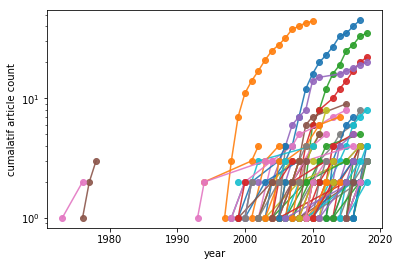

In [78]:
def getYearCount(key):
    
    article = biblio.getArticleFromKey(key)
    return (article.year, article.nbrCitation)

groupId = 0

for groupId in range(len(groupByAuthors[:])):
    years = [ biblio.getArticleFromKey(key).year for key in groupByAuthors[groupId]]
    year_span = sorted( set(years) )
    count = [ years.count(y) for y in year_span  ]
    plt.semilogy( year_span, np.cumsum(count), 'o-', alpha=0.9 )
    
    
plt.xlabel('year');plt.ylabel('cumalatif article count');

In [79]:
def articleToDict( article ):

    dico = {}
    dico['title'] = article.title
    dico['nbrCitation'] = article.nbrCitation
    dico['journal'] = article.journal
    dico['year'] = article.year
    dico['authors'] = '; '.join(article.authors)
    return dico

In [69]:
groupId = 0
dfGrp = pd.DataFrame.from_records( [articleToDict(biblio.getArticleFromKey(key)) for key in groupByAuthors[groupId]] )
dfGrp

### Authors and affiliation

In [57]:
groupId = 1
for a in groupByAuthors[groupId]: 
    article =  biblio.getArticleFromKey(a)
    print('; '.join( sorted(article.authors ) ))

Feng, X.; Huang, Y.; Hwang, K.C.; Shi, Z.; Xiao, J.
Huang, Y.; Hwang, K.C.; Shi, M.X.
Huang, Y.; Hwang, K.C.; Shi, M.X.
Chen, J.Y.; Guo, T.F.; Huang, Y.; Hwang, K.C.; Zhang, L.
Huang, Y.; Hwang, K.C.; Wu, P.D.; Yun, G.
Gao, H.; Han, C.-S.; Huang, Y.; Hwang, K.C.; Liu, B.; Ravichandran, G.; Wang, H.; Wu, P.D.
Gao, H.; Huang, Y.; Hwang, K.C.; Nix, W.D.; Qiu, X.
Huang, Y.; Li, M.; Xue, Z.
Huang, Y.; Hwang, K.-C.; Zhang, F.
Chen, J.Y.; Huang, Y.; Hwang, K.C.; Zhang, L.
Chen, J.Y.; Huang, Y.; Hwang, K.C.; Xia, Z.C.
Feng, X.; Huang, Y.; Hwang, K.-C.; Qin, J.; Qu, S.; Xiao, J.
Huang, Y.; Hwang, K.C.; Li, M.; Xue, Z.
Huang, Y.; Hwang, K.C.; Li, M.; Liu, B.; Liu, C.; Qiu, X.
Chen, J.Y.; Huang, Y.; Hutchinson, J.W.; Hwang, K.C.; Wei, Y.
Gao, H.; Huang, Y.
Gao, H.; Huang, Y.; Hwang, K.C.; Jiang, H.
Guo, T.F.; Huang, Y.; Hwang, K.-C.; Zhang, L.
Huang, Y.; Kolednik, O.; Siegmund, T.; Srinivasan, K.
Feng, X.; Huang, Y.; Hwang, K.C.; Pharr, G.M.
Huang, Y.; Hwang, K.C.; Jiang, H.; Liu, C.; Qu, S.; Wu,

In [59]:
groupId = 6
for a in groupByAuthors[groupId]:
    print('; '.join( biblio.getArticleFromKey(a).authors ))
    print( [ parseAffiliation( aff ) for aff in  biblio.getArticleFromKey(a).affiliation ] )

Hochrainer, T.; Zaiser, M.; Gumbsch, P.
[('76131 Karlsruhe', 'Germany'), ('Edinburgh EH93JL', 'United Kingdom'), ('79108 Freiburg', 'Germany')]
Sandfeld, S.; Hochrainer, T.; Zaiser, M.; Gumbsch, P.
[('76131 Karlsruhe', 'Germany'), ('FL 32310', 'United States'), ('Edinburgh EH93JL', 'United Kingdom'), ('79108 Freiburg', 'Germany')]
Wu, R.; Zaiser, M.; Sandfeld, S.
[('Fürth', 'Germany'), ('Freiberg', 'Germany')]
Schulz, K.; Dickel, D.; Schmitt, S.; Sandfeld, S.; Weygand, D.; Gumbsch, P.
[('76131 Karlsruhe', 'Germany'), ('90762 Fürth', 'Germany'), ('79108 Freiburg', 'Germany')]
Monavari, M.; Sandfeld, S.; Zaiser, M.
[('Fürth', 'Germany')]
Sandfeld, S.; Hochrainer, T.; Gumbsch, P.; Zaiser, M.
[('76131 Karlsruhe', 'Germany'), ('79108 Freiburg', 'Germany'), ('EH9 3JL', 'United Kingdom')]
Schulz, K.; Sudmanns, M.; Gumbsch, P.
[('Karlsruhe', 'Germany'), ('Freiburg', 'Germany')]
Sandfeld, S.; Monavari, M.; Zaiser, M.
[('90762 Fürth', 'Germany')]


In [191]:
distanceByCoauthors.number_of_nodes()

159

In [56]:
def parseAffiliation( aff ):
    ''' take the affiliation string (already splited)
    '''
    aff = aff.split(',')
    country = aff[-1].strip()
    city = aff[-2].strip()
    
    return city, country